In [1]:
from typing import List, Tuple
from pathlib import Path
from multiprocess import Pool
from multiprocess.pool import ThreadPool

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import plotly.express as px
import tqdm

import talib

In [2]:
from market_data import MarketData

# Load Data

In [3]:
market_data = MarketData('dataset')

In [4]:
sp500_df = pd.read_parquet('dataset/us_stock/sp500.parquet')
dowjones_df = pd.read_parquet('dataset/us_stock/dowjones.parquet')
nasdaq_df = pd.read_parquet('dataset/us_stock/nasdaq100.parquet')

In [5]:
profile_df = pd.read_parquet('dataset/us_stock/profile.parquet')
profile_df

,symbol,price,beta,volAvg,mktCap,lastDiv,range,changes,companyName,currency,cik,isin,cusip,exchange,exchangeShortName,industry,website,description,ceo,sector,country,fullTimeEmployees,phone,address,city,state,zip,dcfDiff,dcf,image,ipoDate,defaultImage,isEtf,isActivelyTrading,isAdr,isFund
0,MMM,116.81,0.986735,9717346,64667652096,5.95,107.07-186.3,3.699997,3M Company,USD,0000066740,US88579Y1010,88579Y101,New York Stock Exchange,NYSE,Conglomerates,https://www.3m.com,3M Company operates as a diversified technolog...,Mr. Michael Roman,Industrials,US,95000,16517331474,"3M Center, Bldg. 220-13E-26A",Saint Paul,MINNESOTA,55144-1000,7.79771,124.6080,https://financialmodelingprep.com/image-stock/...,1946-01-14,False,False,True,False,False
1,AOS,50.13,1.208548,1045389,7742478336,1.12,46.58-86.74,1.370003,A. O. Smith Corporation,USD,0000091142,US8318652091,831865209,New York Stock Exchange,NYSE,Specialty Industrial Machinery,https://www.aosmith.com,A. O. Smith Corporation manufactures and marke...,Mr. Kevin Wheeler,Industrials,US,13700,14143594000,11270 W Park Pl,Milwaukee,WISCONSIN,53224-9508,2.72625,52.8563,https://financialmodelingprep.com/image-stock/...,1994-12-14,False,False,True,False,False
2,ABT,95.06,0.709285,5323529,166470959104,1.88,93.25-142.6,-0.150002,Abbott Laboratories,USD,0000001800,US0028241000,002824100,New York Stock Exchange,NYSE,Medical Devices,https://www.abbott.com,"Abbott Laboratories, together with its subsidi...",Mr. Robert Ford,Healthcare,US,113000,12246676100,100 Abbott Park Rd,ABBOTT PARK,ILLINOIS,60064-6400,5.48656,100.5470,https://financialmodelingprep.com/image-stock/...,1937-03-01,False,False,True,False,False
3,ABBV,147.06,0.647383,5405496,260016783360,5.64,107.75-175.91,4.130005,AbbVie Inc.,USD,0001551152,US00287Y1091,00287Y109,New York Stock Exchange,NYSE,Drug Manufacturers—General,https://www.abbvie.com,"AbbVie Inc. discovers, develops, manufactures,...",Mr. Richard Gonzalez,Healthcare,US,50000,18479327900,1 N Waukegan Rd,North Chicago,ILLINOIS,60064-6400,5.52139,152.5810,https://financialmodelingprep.com/image-stock/...,2013-01-02,False,False,True,False,False
4,ABMD,256.22,1.314296,271576,11647991808,0.00,219.85-379.3,3.710007,"Abiomed, Inc.",USD,0000815094,US0036541003,003654100,NASDAQ Global Select,NASDAQ,Medical Devices,https://www.abiomed.com,"Abiomed, Inc. engages in the research, develop...",Mr. Michael Minogue,Healthcare,US,2003,19787775410,22 CHERRY HILL DR,Danvers,MASSACHUSETTS,01923,2.89484,259.1150,https://financialmodelingprep.com/image-stock/...,1987-07-29,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,CRUS,67.80,1.006263,467129,3792759296,0.00,61.94-95.84,2.330002,"Cirrus Logic, Inc.",USD,0000772406,US1727551004,172755100,NASDAQ Global Select,NASDAQ,Semiconductors,https://www.cirrus.com,"Cirrus Logic, Inc., a fabless semiconductor co...",Dr. Jason Rhode,Technology,US,1591,15128514000,800 W 6th St,Austin,TEXAS,78701,6.25288,74.0529,https://financialmodelingprep.com/image-stock/...,1989-06-09,False,False,True,False,False
726,RPM,88.73,0.938835,606259,11454954496,1.62,74.56-101.48,2.110001,RPM International Inc.,USD,0000110621,US7496851038,749685103,New York Stock Exchange,NYSE,Specialty Chemicals,https://www.rpminc.com,"RPM International Inc. manufactures, markets, ...",Mr. Frank Sullivan,Basic Materials,US,16751,13302735090,"2628 Pearl Rd, PO Box 777",Medina,OHIO,44258,1.91352,90.6435,https://financialmodelingprep.com/image-stock/...,1998-01-09,False,False,True,False,False
727,OSI,9.80,0.000000,9907,281750016,0.00,9.63-10.0,0.000000,Osiris Acquisition Corp.,USD,0001832136,None,None,New York Stock Exchange,NYSE,Shell Companies,https://osirisacquisitioncorp.com,Osiris Acquisition Corp. does not have signifi...,Mr. Benjamin E. Black,Financial Services,US,,646 993 4635,95 5th Avenue,New York,NY,10003,NaN,0.0000,https://financialmodelingprep.com/image-stock/...

In [6]:
px.treemap(profile_df[profile_df['symbol'].isin(sp500_df['symbol'])], path=['sector', 'industry'])

In [7]:
price_df = market_data.read_batch(profile_df['symbol'])
price_df

100%|██████████| 730/730 [00:05<00:00, 135.60it/s]


,MMM,AOS,ABT,ABBV,ABMD,ACN,ATVI,ADM,ADBE,ADP,AAP,AES,AFL,A,APD,AKAM,ALK,ALB,ARE,ALGN,ALLE,LNT,ALL,GOOGL,GOOG,MO,AMZN,AMCR,AMD,AEE,AAL,AEP,AXP,AIG,AMT,AWK,AMP,ABC,AME,AMGN,APH,ADI,ANSS,AON,APA,AAPL,AMAT,APTV,ANET,AJG,AIZ,T,ATO,ADSK,AZO,AVB,AVY,BKR,BALL,BAC,BBWI,BAX,BDX,WRB,BRK-B,BBY,BIO,TECH,BIIB,BLK,BK,BA,BKNG,BWA,BXP,BSX,BMY,AVGO,BR,BRO,BF-B,CHRW,CDNS,CZR,CPT,CPB,COF,CAH,KMX,CCL,CARR,CTLT,CAT,CBOE,CBRE,CDW,CE,CNC,CNP,CDAY,CF,CRL,SCHW,CHTR,CVX,CMG,CB,CHD,CI,CINF,CTAS,CSCO,C,CFG,CLX,CME,CMS,KO,CTSH,CL,CMCSA,CMA,CAG,COP,ED,STZ,CEG,COO,CPRT,GLW,CTVA,CSGP,COST,CTRA,CCI,CSX,CMI,CVS,DHI,DHR,DRI,DVA,DE,DAL,XRAY,DVN,DXCM,FANG,DLR,DFS,DISH,DIS,DG,DLTR,D,DPZ,DOV,DOW,DTE,DUK,DD,DXC,EMN,ETN,EBAY,ECL,EIX,EW,EA,ELV,LLY,EMR,ENPH,ETR,EOG,EPAM,EQT,EFX,EQIX,EQR,ESS,EL,ETSY,RE,EVRG,ES,EXC,EXPE,EXPD,EXR,XOM,FFIV,FDS,FAST,FRT,FDX,FITB,FRC,FE,FIS,FISV,FLT,FMC,F,FTNT,FTV,FBHS,FOXA,FOX,BEN,FCX,GRMN,IT,GNRC,GD,GE,GIS,GM,GPC,GILD,GL,GPN,GS,HAL,HIG,HAS,HCA,PEAK,HSIC,HSY,HES,HPE,HLT,HOLX,HD,HON,HRL,HST,HWM,HPQ,HUM,HBAN,HII,IBM,IEX,IDXX,ITW,ILMN,INCY,IR,INTC,ICE,IP,IPG,IFF,INTU,ISRG,IVZ,INVH,IQV,IRM,JBHT,JKHY,J,JNJ,JCI,JPM,JNPR,K,KDP,KEY,KEYS,KMB,KIM,KMI,KLAC,KHC,KR,LHX,LH,LRCX,LW,LVS,LDOS,LEN,LNC,LIN,LYV,LKQ,LMT,L,LOW,LUMN,LYB,MTB,MRO,MPC,MKTX,MAR,MMC,MLM,MAS,MA,MTCH,MKC,MCD,MCK,MDT,MRK,META,MET,MTD,MGM,MCHP,MU,MSFT,MAA,MRNA,MHK,MOH,TAP,MDLZ,MPWR,MNST,MCO,MS,MOS,MSI,MSCI,NDAQ,NTAP,NFLX,NWL,NEM,NWSA,NWS,NEE,NKE,NI,NDSN,NSC,NTRS,NOC,NLOK,NCLH,NRG,NUE,NVDA,NVR,NXPI,ORLY,OXY,ODFL,OMC,ON,OKE,ORCL,OGN,OTIS,PCAR,PKG,PARA,PH,PAYX,PAYC,PYPL,PNR,PEP,PKI,PFE,PCG,PM,PSX,PNW,PXD,PNC,POOL,PPG,PPL,PFG,PG,PGR,PLD,PRU,PEG,PTC,PSA,PHM,QRVO,PWR,QCOM,DGX,RL,RJF,RTX,O,REG,REGN,RF,RSG,RMD,RHI,ROK,ROL,ROP,ROST,RCL,SPGI,CRM,SBAC,SLB,STX,SEE,SRE,NOW,SHW,SBNY,SPG,SWKS,SJM,SNA,SEDG,SO,LUV,SWK,SBUX,STT,STE,SYK,SIVB,SYF,SNPS,SYY,TMUS,TROW,TTWO,TPR,TRGP,TGT,TEL,TDY,TFX,TER,TSLA,TXN,TXT,TMO,TJX,TSCO,TT,TDG,TRV,TRMB,TFC,TWTR,TYL,TSN,USB,UDR,ULTA,UNP,UAL,UPS,URI,UNH,UHS,VLO,VTR,VRSN,VRSK,VZ,VRTX,VFC,VTRS,VICI,V,VNO,VMC,WAB,WBA,WMT,WBD,WM,WAT,WEC,WFC,WELL,WST,WDC,WRK,WY,WHR,WMB,WTW,GWW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZION,ZTS,NLSN,CTXS,DRE,PVH,PENN,IPGP,CERN,PBCT,INFO,XLNX,GPS,LEG,HBI,WU,KSU,PRGO,UNM,NOV,MXIM,ALXN,HFC,FLS,SLG,XRX,VNT,FTI,AIV,HRB,COTY,KSS,ADS,HOG,JWN,HP,CPRI,M,ARNC,XEC,AMG,TRIP,MAC,NKTR,JEF,FL,LLL,MAT,FLR,BHF,GT,SRCL,XL,RRC,AYI,MON,NAVI,SIG,PDCO,CHK,AN,RIG,BBBY,MUR,TDC,R,TGNA,DNB,SWN,URBN,FSLR,ENDP,PBI,SE,OI,AA,DO,ADT,GME,THC,UA,CNX,FOSL,ALTR,GNW,PLL,NE,ATI,NBR,JBL,BTU,GHC,DISCK,X,IGT,LSI,BEAM,UAA,SLM,CLF,LIFE,FB,ANF,DELL,SAI,S,FHN,BIG,RRD,SUN,DV,SHLD,MMI,EP,CPWR,ITT,ODP,NYT,SII,STR,CIEN,DYN,KBH,MBI,WB,BC,NCR,GRA,CCK,RAD,TMC,FSR,USL,ABNB,ASML,AZN,TEAM,BIDU,CRWD,DDOG,DOCU,JD,LCID,LULU,MRVL,MELI,SIRI,SPLK,WDAY,ZM,ZS,NTES,OKTA,PANW,PDD,SGEN,BMRN,LBTYA,LBTYK,PTON,QRTEA,VOD,LILAK,LILA,DISCA,BATRK,BATRA,FWONK,FWONA,LSXMA,LSXMK,TCOM,VEON,NUAN,GOLD,FLEX,BB,INFY,TEVA,QGEN,LOGI,STLD,RYAAY,IAC,JAVA,LEAP,LAMR,PTEN,ERIC,AEO,VIAV,CHIR,SANM,PRDO,VRTS,GNTX,SPOT,ADCT,CNXT,CNET,COMS,INKT,STCN,RNWK,MLHR,CHKP,LGTO,ADPT,EYE,TRIN,CBRL,WOR,CNTO,QMCO,ASND,FORE,ADTN,SY,DURA,DIGI,AM,CRUS,RPM,OSI,UK,TX
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1998-01-02,41.75000,4.763889,15.136377,NaN,8.12500,NaN,1.359375,17.842360,4.9977,23.791923,NaN,22.65625,6.273438,NaN,38.650555,NaN,9.593750,12.03125,31.625,NaN,NaN,16.562500,45.56250,NaN,

# Correlation

In [8]:
trading_day_per_year = 252

In [9]:
corr_df = price_df.corr(min_periods=trading_day_per_year * 5)
corr_df

,MMM,AOS,ABT,ABBV,ABMD,ACN,ATVI,ADM,ADBE,ADP,AAP,AES,AFL,A,APD,AKAM,ALK,ALB,ARE,ALGN,ALLE,LNT,ALL,GOOGL,GOOG,MO,AMZN,AMCR,AMD,AEE,AAL,AEP,AXP,AIG,AMT,AWK,AMP,ABC,AME,AMGN,APH,ADI,ANSS,AON,APA,AAPL,AMAT,APTV,ANET,AJG,AIZ,T,ATO,ADSK,AZO,AVB,AVY,BKR,BALL,BAC,BBWI,BAX,BDX,WRB,BRK-B,BBY,BIO,TECH,BIIB,BLK,BK,BA,BKNG,BWA,BXP,BSX,BMY,AVGO,BR,BRO,BF-B,CHRW,CDNS,CZR,CPT,CPB,COF,CAH,KMX,CCL,CARR,CTLT,CAT,CBOE,CBRE,CDW,CE,CNC,CNP,CDAY,CF,CRL,SCHW,CHTR,CVX,CMG,CB,CHD,CI,CINF,CTAS,CSCO,C,CFG,CLX,CME,CMS,KO,CTSH,CL,CMCSA,CMA,CAG,COP,ED,STZ,CEG,COO,CPRT,GLW,CTVA,CSGP,COST,CTRA,CCI,CSX,CMI,CVS,DHI,DHR,DRI,DVA,DE,DAL,XRAY,DVN,DXCM,FANG,DLR,DFS,DISH,DIS,DG,DLTR,D,DPZ,DOV,DOW,DTE,DUK,DD,DXC,EMN,ETN,EBAY,ECL,EIX,EW,EA,ELV,LLY,EMR,ENPH,ETR,EOG,EPAM,EQT,EFX,EQIX,EQR,ESS,EL,ETSY,RE,EVRG,ES,EXC,EXPE,EXPD,EXR,XOM,FFIV,FDS,FAST,FRT,FDX,FITB,FRC,FE,FIS,FISV,FLT,FMC,F,FTNT,FTV,FBHS,FOXA,FOX,BEN,FCX,GRMN,IT,GNRC,GD,GE,GIS,GM,GPC,GILD,GL,GPN,GS,HAL,HIG,HAS,HCA,PEAK,HSIC,HSY,HES,HPE,HLT,HOLX,HD,HON,HRL,HST,HWM,HPQ,HUM,HBAN,HII,IBM,IEX,IDXX,ITW,ILMN,INCY,IR,INTC,ICE,IP,IPG,IFF,INTU,ISRG,IVZ,INVH,IQV,IRM,JBHT,JKHY,J,JNJ,JCI,JPM,JNPR,K,KDP,KEY,KEYS,KMB,KIM,KMI,KLAC,KHC,KR,LHX,LH,LRCX,LW,LVS,LDOS,LEN,LNC,LIN,LYV,LKQ,LMT,L,LOW,LUMN,LYB,MTB,MRO,MPC,MKTX,MAR,MMC,MLM,MAS,MA,MTCH,MKC,MCD,MCK,MDT,MRK,META,MET,MTD,MGM,MCHP,MU,MSFT,MAA,MRNA,MHK,MOH,TAP,MDLZ,MPWR,MNST,MCO,MS,MOS,MSI,MSCI,NDAQ,NTAP,NFLX,NWL,NEM,NWSA,NWS,NEE,NKE,NI,NDSN,NSC,NTRS,NOC,NLOK,NCLH,NRG,NUE,NVDA,NVR,NXPI,ORLY,OXY,ODFL,OMC,ON,OKE,ORCL,OGN,OTIS,PCAR,PKG,PARA,PH,PAYX,PAYC,PYPL,PNR,PEP,PKI,PFE,PCG,PM,PSX,PNW,PXD,PNC,POOL,PPG,PPL,PFG,PG,PGR,PLD,PRU,PEG,PTC,PSA,PHM,QRVO,PWR,QCOM,DGX,RL,RJF,RTX,O,REG,REGN,RF,RSG,RMD,RHI,ROK,ROL,ROP,ROST,RCL,SPGI,CRM,SBAC,SLB,STX,SEE,SRE,NOW,SHW,SBNY,SPG,SWKS,SJM,SNA,SEDG,SO,LUV,SWK,SBUX,STT,STE,SYK,SIVB,SYF,SNPS,SYY,TMUS,TROW,TTWO,TPR,TRGP,TGT,TEL,TDY,TFX,TER,TSLA,TXN,TXT,TMO,TJX,TSCO,TT,TDG,TRV,TRMB,TFC,TWTR,TYL,TSN,USB,UDR,ULTA,UNP,UAL,UPS,URI,UNH,UHS,VLO,VTR,VRSN,VRSK,VZ,VRTX,VFC,VTRS,VICI,V,VNO,VMC,WAB,WBA,WMT,WBD,WM,WAT,WEC,WFC,WELL,WST,WDC,WRK,WY,WHR,WMB,WTW,GWW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZION,ZTS,NLSN,CTXS,DRE,PVH,PENN,IPGP,CERN,PBCT,INFO,XLNX,GPS,LEG,HBI,WU,KSU,PRGO,UNM,NOV,MXIM,ALXN,HFC,FLS,SLG,XRX,VNT,FTI,AIV,HRB,COTY,KSS,ADS,HOG,JWN,HP,CPRI,M,ARNC,XEC,AMG,TRIP,MAC,NKTR,JEF,FL,LLL,MAT,FLR,BHF,GT,SRCL,XL,RRC,AYI,MON,NAVI,SIG,PDCO,CHK,AN,RIG,BBBY,MUR,TDC,R,TGNA,DNB,SWN,URBN,FSLR,ENDP,PBI,SE,OI,AA,DO,ADT,GME,THC,UA,CNX,FOSL,ALTR,GNW,PLL,NE,ATI,NBR,JBL,BTU,GHC,DISCK,X,IGT,LSI,BEAM,UAA,SLM,CLF,LIFE,FB,ANF,DELL,SAI,S,FHN,BIG,RRD,SUN,DV,SHLD,MMI,EP,CPWR,ITT,ODP,NYT,SII,STR,CIEN,DYN,KBH,MBI,WB,BC,NCR,GRA,CCK,RAD,TMC,FSR,USL,ABNB,ASML,AZN,TEAM,BIDU,CRWD,DDOG,DOCU,JD,LCID,LULU,MRVL,MELI,SIRI,SPLK,WDAY,ZM,ZS,NTES,OKTA,PANW,PDD,SGEN,BMRN,LBTYA,LBTYK,PTON,QRTEA,VOD,LILAK,LILA,DISCA,BATRK,BATRA,FWONK,FWONA,LSXMA,LSXMK,TCOM,VEON,NUAN,GOLD,FLEX,BB,INFY,TEVA,QGEN,LOGI,STLD,RYAAY,IAC,JAVA,LEAP,LAMR,PTEN,ERIC,AEO,VIAV,CHIR,SANM,PRDO,VRTS,GNTX,SPOT,ADCT,CNXT,CNET,COMS,INKT,STCN,RNWK,MLHR,CHKP,LGTO,ADPT,EYE,TRIN,CBRL,WOR,CNTO,QMCO,ASND,FORE,ADTN,SY,DURA,DIGI,AM,CRUS,RPM,OSI,UK,TX
MMM,1.000000,0.928107,0.738539,0.331827,0.800972,0.749144,0.857954,0.739361,0.694622,0.780096,0.847440,-0.212606,0.851682,0.669999,0.820701,0.431241,0.918254,0.709791,0.794495,0.716224,0.258085,0.854803,0.812291,0.681645,0.674921,0.350467,0.724631,0.609272,0.340994,0.625596,0.541493,0.795138,0.784905,-0.667078,0.794899,0.680944,0.724188,0.873980,0.831896,0.883208,0.842066,0.718947,0.761037,0.764562,-0.083628,0.647603,0.571154,0.606578,0.080076,0.680698,0.745075,-0.120281,0.874993,0.744106,0.740634,0.880708,0.632581,-0.111837,0.808877,-0.112343,0.636448,0.842991,0.904096,0.797418,0.856606,0.674347,0.714369,0.668507,0.914941,0.839421,0.498798,0.876015,0.910620,0.835108,0.817904,0.563093,0.528871,0.618585,0.737247,0.704474,0.865656,0.822248,0.517475,0.182676,0.797891,0.568981,0.712613,0.371423,0.865045,0.360233,NaN,-0.087508,0.800454,0.803079,0.665765,0.166339,0.831063,0.822247,0.438630,NaN,0.521883,0.634177,

In [45]:
corr_df['CARR']

MMM    NaN
AOS    NaN
ABT    NaN
ABBV   NaN
ABMD   NaN
        ..
CRUS   NaN
RPM    NaN
OSI    NaN
UK     NaN
TX     NaN
Name: CARR, Length: 727, dtype: float64

In [53]:
corr_pair_df = corr_df.melt(ignore_index=False, var_name='right_symbol', value_name='correlation')
corr_pair_df.index.name = 'left_symbol'
corr_pair_df = corr_pair_df.reset_index()
corr_pair_df = corr_pair_df.sort_values('correlation')
corr_pair_df = corr_pair_df.dropna(subset=['correlation'])
corr_pair_df

,left_symbol,right_symbol,correlation
520215,SLB,ASND,-0.932157
298785,ASND,SLB,-0.932157
419828,NXPI,DO,-0.926678
254300,DO,NXPI,-0.926678
340512,KHC,VRSN,-0.925933
...,...,...,...
330512,TWTR,TWTR,1.000000
329784,TFC,TFC,1.000000
329056,TRMB,TRMB,1.000000
327600,TDG,TDG,1.000000


In [54]:
corr_pair_df = corr_pair_df.merge(
    profile_df[['symbol', 'companyName', 'sector', 'industry']].add_prefix('left_'), 
    how='left', 
    on='left_symbol'
)
corr_pair_df = corr_pair_df.merge(
    profile_df[['symbol', 'companyName', 'sector', 'industry']].add_prefix('right_'),
    how='right',
    on='right_symbol'
)
corr_pair_df.dropna(subset=['left_symbol', 'right_symbol'], inplace=True)
corr_pair_df.sort_values('correlation', ascending=False, inplace=True)

corr_pair_df

,left_symbol,right_symbol,correlation,left_companyName,left_sector,left_industry,right_companyName,right_sector,right_industry
451371,TX,TX,1.000000,Ternium S.A.,Basic Materials,Steel,Ternium S.A.,Basic Materials,Steel
110212,EA,EA,1.000000,Electronic Arts Inc.,Communication Services,Electronic Gaming & Multimedia,Electronic Arts Inc.,Communication Services,Electronic Gaming & Multimedia
107524,EBAY,EBAY,1.000000,eBay Inc.,Consumer Cyclical,Internet Retail,eBay Inc.,Consumer Cyclical,Internet Retail
274840,SWKS,SWKS,1.000000,"Skyworks Solutions, Inc.",Technology,Semiconductors,"Skyworks Solutions, Inc.",Technology,Semiconductors
108196,ECL,ECL,1.000000,Ecolab Inc.,Basic Materials,Specialty Chemicals,Ecolab Inc.,Basic Materials,Specialty Chemicals
...,...,...,...,...,...,...,...,...,...
307769,KHC,VRSN,-0.925933,The Kraft Heinz Company,Consumer Defensive,Packaged Foods,"VeriSign, Inc.",Technology,Software—Infrastructure
374861,NXPI,DO,-0.926678,NXP Semiconductors N.V.,Technology,Semiconductors,"Diamond Offshore Drilling, Inc.",Energy,Oil & Gas Drilling
229144,DO,NXPI,-0.926678,"Diamond Offshore Drilling, Inc.",Energy,Oil & Gas Drilling,NXP Semiconductors N.V.,Technology,Semiconductors
446663,SLB,ASND,-0.932157,Schlumberger Limited,Energy,Oil & Gas Equipment & Services,Ascendis Pharma A/S,Healthcare,Biotechnology


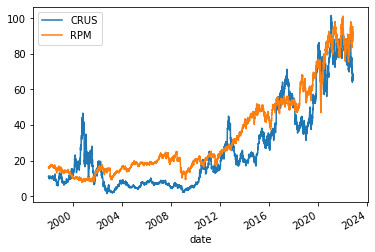

In [56]:
price_df.plot(y=['CRUS', 'RPM'])

In [57]:
corr_pair_df['same_sector'] = corr_pair_df['left_sector'] == corr_pair_df['right_sector']
corr_pair_df['same_industry'] = corr_pair_df['left_industry'] == corr_pair_df['right_industry']


In [58]:
corr_pair_df[
    (corr_pair_df['correlation'] > 0.8)
    & corr_pair_df['same_sector'] 
]

,left_symbol,right_symbol,correlation,left_companyName,left_sector,left_industry,right_companyName,right_sector,right_industry,same_sector,same_industry
451371,TX,TX,1.000000,Ternium S.A.,Basic Materials,Steel,Ternium S.A.,Basic Materials,Steel,True,True
110212,EA,EA,1.000000,Electronic Arts Inc.,Communication Services,Electronic Gaming & Multimedia,Electronic Arts Inc.,Communication Services,Electronic Gaming & Multimedia,True,True
107524,EBAY,EBAY,1.000000,eBay Inc.,Consumer Cyclical,Internet Retail,eBay Inc.,Consumer Cyclical,Internet Retail,True,True
274840,SWKS,SWKS,1.000000,"Skyworks Solutions, Inc.",Technology,Semiconductors,"Skyworks Solutions, Inc.",Technology,Semiconductors,True,True
108196,ECL,ECL,1.000000,Ecolab Inc.,Basic Materials,Specialty Chemicals,Ecolab Inc.,Basic Materials,Specialty Chemicals,True,True
...,...,...,...,...,...,...,...,...,...,...,...
230118,LEN,ORLY,0.800170,Lennar Corporation,Consumer Cyclical,Residential Construction,"O'Reilly Automotive, Inc.",Consumer Cyclical,Specialty Retail,True,False
19911,WEC,AEE,0.800127,"WEC Energy Group, Inc.",Utilities,Utilities—Regulated Electric,Ameren Corporation,Utilities,Utilities—Regulated Electric,True,True
318817,AEE,WEC,0.800127,Ameren Corporation,Utilities,Utilities—Regulated Electric,"WEC Energy Group, Inc.",Utilities,Utilities—Regulated Electric,True,True
257661,L,RJF,0.800096,Loews Corporation,Financial Services,Insurance—Property & Casualty,"Raymond James Financial, Inc.",Financial Services,Capital Markets,True,False


In [59]:
corr_pair_df[
    (corr_pair_df['correlation'] < -0.8)
    & corr_pair_df['same_sector'] 
]

,left_symbol,right_symbol,correlation,left_companyName,left_sector,left_industry,right_companyName,right_sector,right_industry,same_sector,same_industry
67886,VEON,CHTR,-0.802786,VEON Ltd.,Communication Services,Telecom Services,"Charter Communications, Inc.",Communication Services,Telecom Services,True,True
424517,CHTR,VEON,-0.802786,"Charter Communications, Inc.",Communication Services,Telecom Services,VEON Ltd.,Communication Services,Telecom Services,True,True
58464,ASND,CAH,-0.803563,Ascendis Pharma A/S,Healthcare,Biotechnology,"Cardinal Health, Inc.",Healthcare,Medical Distribution,True,False
446698,CAH,ASND,-0.803563,"Cardinal Health, Inc.",Healthcare,Medical Distribution,Ascendis Pharma A/S,Healthcare,Biotechnology,True,False
180816,DG,KHC,-0.804306,Dollar General Corporation,Consumer Defensive,Discount Stores,The Kraft Heinz Company,Consumer Defensive,Packaged Foods,True,False
...,...,...,...,...,...,...,...,...,...,...,...
191516,CHTR,LUMN,-0.887854,"Charter Communications, Inc.",Communication Services,Telecom Services,"Lumen Technologies, Inc.",Communication Services,Telecom Services,True,True
441312,FLT,RNWK,-0.890361,"FLEETCOR Technologies, Inc.",Technology,Software—Infrastructure,"RealNetworks, Inc.",Technology,Software—Application,True,False
131717,RNWK,FLT,-0.890361,"RealNetworks, Inc.",Technology,Software—Application,"FLEETCOR Technologies, Inc.",Technology,Software—Infrastructure,True,False
446669,WBA,ASND,-0.896056,"Walgreens Boots Alliance, Inc.",Healthcare,Pharmaceutical Retailers,Ascendis Pharma A/S,Healthcare,Biotechnology,True,False


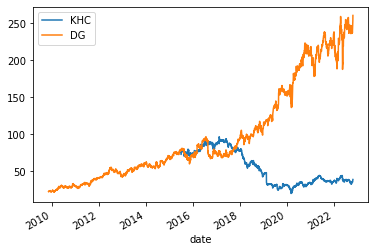

In [60]:
price_df.plot(y=['KHC', 'DG'])

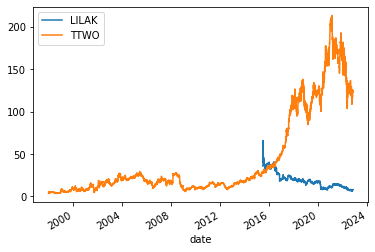

In [61]:
price_df.plot(y=['LILAK', 'TTWO'])

In [62]:
corr_df.to_csv('analysis/correlation_matrix.csv', index=True)
corr_pair_df.to_csv('analysis/correlation_pair.csv', index=False)